In [41]:
# Phân loại cơ bản: Dự đoán ảnh quần áo giày dép
# Hướng dẫn này dùng tf.keras, một API cấp cao để xây dựng và huấn luyện các mô hình trong TensorFlow.

In [182]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

from tensorflow.keras import Sequential

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [59]:
# Tập dữ liệu sau khi được tải sẽ trả về 4 mảng NumPy:
# 2 mảng train_images và train_labels là tập huấn luyện. Mô hình sẽ học từ dữ liệu của 2 mảng này.
# 2 mảng test_images vả test_labels là tập kiểm thử. Sau khi mô hình được huấn luyện xong, chúng ta sẽ chạy thử mô hình với dữ liệu đầu vào từ test_images để lấy kết quả, và so sánh kết quả đó với dữ liệu đối ứng từ test_labels để đánh giá chất lượng của mạng neuron.
# Mỗi ảnh là một mảng NumPy 2 chiều, 28x28, với mỗi pixel có giá trị từ 0 đến 255. Nhãn là một mảng của các số nguyên từ 0 đến 9, tương ứng với mỗi lớp quần áo giày dép:

In [207]:
# import tập dữ liệu về quần áo và giày dép từ Fashion MNIST

fashion_mnist = keras.datasets.fashion_mnist

( train_images , train_labels) , (test_images, test_labels) = fashion_mnist.load_data()


# train_images = train_images / 255.0

# function save the array or img to text
NUB = 2
DATA_TEXT = 'data_text'

# print ( train_images[NUB] )
np.savetxt( DATA_TEXT + '/text.csv' , train_images[NUB]  , fmt='%s' )

# # function save array to img via plt 
def FUNCTION_SAVE(data_img):
    leng = len(data_img)
    for numb in leng:
        str_a = 'data/'
        str_b = '.png'
        str_a = str_a +  str(numb) + str_b
        plt.imsave(str_a ,  data_img[numb] )

FUNCTION_SAVE(tr)

60000

In [95]:
# khám phá dữ liệu 
print ("train_images.shape : ",train_images.shape )
print("train_image:" , train_images.size)
print ("train_images[1].size : ",train_images[1].size)
print("leng : ", len(train_images))


train_images.shape :  (60000, 28, 28)
train_image: 47040000
train_images[1].size :  784
leng :  60000


In [48]:
class_names = ['Áo thun', 'Quần dài', 'Áo liền quần', 'Đầm', 'Áo khoác', \
                         'Sandal', 'Áo sơ mi', 'Giày', 'Túi xách', 'Ủng']

In [49]:
for x in class_names:
    print(" class : ", x)

class :  Áo thun
 class :  Quần dài
 class :  Áo liền quần
 class :  Đầm
 class :  Áo khoác
 class :  Sandal
 class :  Áo sơ mi
 class :  Giày
 class :  Túi xách
 class :  Ủng


In [50]:
# Tiền xử lý dữ liệu
# Dữ liệu cần được tiền xử lý trước khi được dùng để huấn luyện mạng neuron. Phân tích ảnh đầu tiên trong tập dữ liệu, chúng ta sẽ thấy các pixel có giá trị từ 0 đến 255:

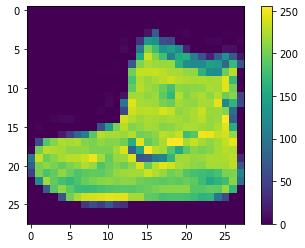

In [208]:
def fun_show(x):
    plt.figure()
    plt.imshow(train_images[x])
    plt.colorbar()
    plt.show()

for x in range(1) :
    fun_show(x)



In [52]:
# Chúng ta cần tiền xử lý để mỗi một điểm ảnh có giá trị từ 0 đến 1 (có thể hiểu là 0% đến 100%). Để làm điều này, chúng ta chỉ cần lấy giá trị của pixel chia cho 255. Cần lưu ý rằng việc tiền xử lý này phải được áp dụng đồng thời cho cả tập huấn luyện và tập kiểm thử:

In [53]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# print (train_images)

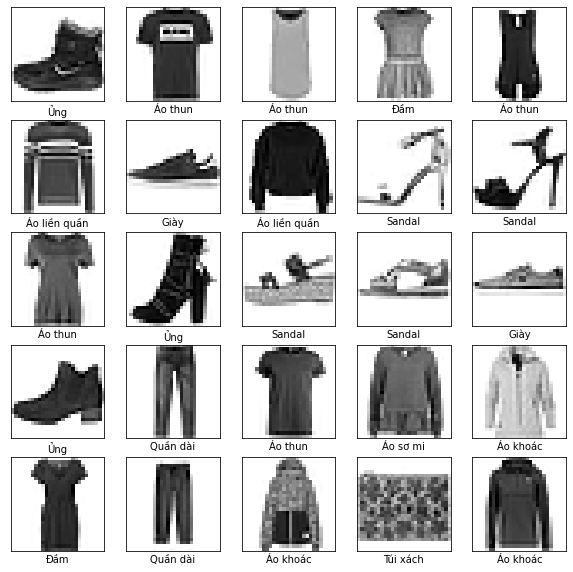

In [54]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [55]:
# Thiết lập các layers
# Thành phần cơ bản của một mạng neuron là các layer. Các layer trích xuất các điểm đặc biệt từ dữ liệu mà chúng đón nhận. Khi thực hiện tốt, những điểm đặc biệt này mang nhiều ý nghĩa và phục vụ cho toán của chúng ta.

# Đa số các mô hình deep learning đều chứa các layer đơn gian được xâu chuỗi lại với nhau. Đa số các layer, ví dụ tf.keras.layers.Dense, đều có các trọng số sẽ được học trong quá trình huấn luyện.



In [56]:
A = np.array( [
     [1, 2, 3], 
     [3, 4, 5],
     [4, 7, 8]
     ])

print(A)

[[1 2 3]
 [3 4 5]
 [4 7 8]]


In [57]:
model = keras.Sequential([
    keras.layers.Flatten( input_shape = (28, 28) ), 
    keras.layers.Dense( 128, activation = 'relu'),
    keras.layers.Dense(10, activation='softmax')
])

model_01 = keras.Sequential([
    keras.layers.Flatten( input_shape = (28, 28) ), 
])



In [58]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.4989 - accuracy: 0.8267
Epoch 2/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.3739 - accuracy: 0.8638
Epoch 3/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3384 - accuracy: 0.8779
Epoch 4/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3164 - accuracy: 0.8843
Epoch 5/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2942 - accuracy: 0.8914
Epoch 6/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2814 - accuracy: 0.8957
Epoch 7/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2668 - accuracy: 0.9017
Epoch 8/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2594 - accuracy: 0.9041
Epoch 9/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.2478 - accuracy: 0.9091
Epoch 10/10
6